In [1]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
path = kagglehub.dataset_download("shivam2503/diamonds")
csv_file_path = os.path.join(path, "diamonds.csv")

In [3]:
df = pd.read_csv(csv_file_path)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

df = df[(df["x"]!=0) & (df["y"]!=0) & (df["z"]!=0)]

In [9]:
outliers = pd.DataFrame()

for feature in df.select_dtypes(include=['number']).columns:

    Q1 = np.percentile(df[feature], 25, interpolation = 'midpoint')
    Q2 = np.percentile(df[feature], 50, interpolation = 'midpoint')
    Q3 = np.percentile(df[feature], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    outliers_features = df[(df[feature] < low_lim) | (df[feature] > up_lim)]

    if not outliers_features.empty:
        outliers = pd.concat([outliers, outliers_features])

outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, 12246 to 48410
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    8637 non-null   float64
 1   cut      8637 non-null   object 
 2   color    8637 non-null   object 
 3   clarity  8637 non-null   object 
 4   depth    8637 non-null   float64
 5   table    8637 non-null   float64
 6   price    8637 non-null   int64  
 7   x        8637 non-null   float64
 8   y        8637 non-null   float64
 9   z        8637 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 742.2+ KB


In [10]:
df_cleaned = df.drop(outliers.index)
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47524 entries, 0 to 47523
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47524 non-null  float64
 1   cut      47524 non-null  object 
 2   color    47524 non-null  object 
 3   clarity  47524 non-null  object 
 4   depth    47524 non-null  float64
 5   table    47524 non-null  float64
 6   price    47524 non-null  int64  
 7   x        47524 non-null  float64
 8   y        47524 non-null  float64
 9   z        47524 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [11]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,47524.0,0.708700,0.371104,0.20,0.38,0.60,1.01,2.00
depth,47524.0,61.786512,1.105911,58.80,61.10,61.90,62.50,64.70
table,47524.0,57.260186,2.021552,52.00,56.00,57.00,59.00,63.50
price,47524.0,3109.662381,2749.696633,326.00,890.00,2061.00,4636.25,11883.00
x,47524.0,5.546656,0.979906,3.73,4.64,5.44,6.41,8.28
y,47524.0,5.551478,0.973990,3.68,4.65,5.45,6.41,8.27
z,47524.0,3.428376,0.606158,1.41,2.86,3.36,3.98,5.30


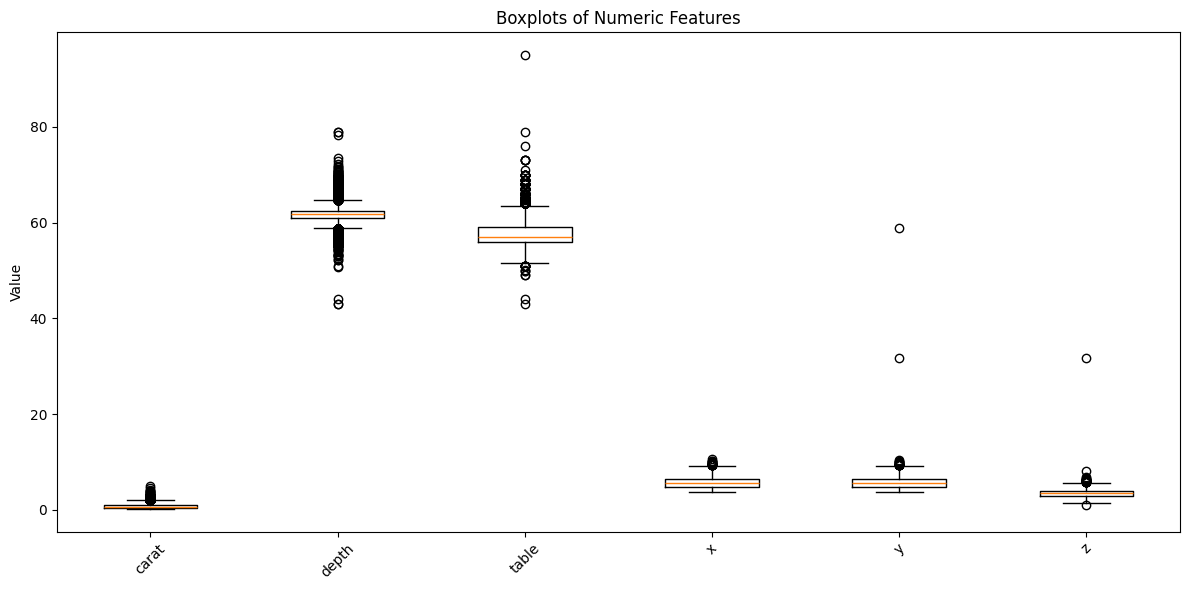

In [ ]:
numeric_df = df.select_dtypes(include='number')
numeric_df.drop("price", axis=1, inplace=True)

plt.figure(figsize=(12, 6))
plt.boxplot(numeric_df.values, labels=numeric_df.columns, vert=True)
plt.title("Boxplots of Numeric Features")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
print(categorical_features)

['cut', 'color', 'clarity']


In [14]:
df_encoded = df_cleaned.copy()
encoder = LabelEncoder()

for feature in categorical_features:
    df_encoded[feature] = encoder.fit_transform(df_encoded[feature])

df_encoded.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
4,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


In [15]:
print(df_encoded.corr()["price"].sort_values(ascending=False))

price      1.000000
carat      0.922932
y          0.900985
x          0.899843
z          0.896579
color      0.140451
table      0.136834
cut        0.050275
depth      0.006180
clarity   -0.068051
Name: price, dtype: float64


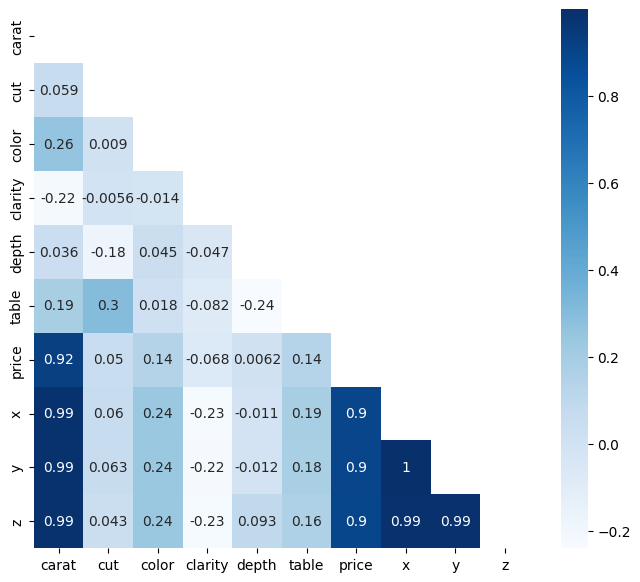

In [16]:
corr = df_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 7))
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues')
plt.show()

In [17]:
selected_x = df_encoded[['carat', 'x', 'y', 'z']]
y = df_encoded['price']
selected_x.head()

,carat,x,y,z
0,0.23,3.95,3.98,2.43
1,0.21,3.89,3.84,2.31
2,0.29,4.20,4.23,2.63
3,0.31,4.34,4.35,2.75
4,0.24,3.94,3.96,2.48


In [18]:
selected_x.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)